In [113]:
import numpy as np
import pandas as pd

In [114]:
import csv
count = 0
with open('tennis.csv', 'r') as infile, open('processed.csv', 'w') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    for row in reader:
        if count == 0:
          writer.writerow(row)
          count += 1
          continue

        if int(row[2]) > 80:
          row[2] = 'high'
        else:
          row[2] = 'normal'

        if int(row[1]) < 70:
          row[1] = 'cold'
        elif int(row[1]) < 80:
          row[1] = 'mild'
        else:
          row[1] = 'hot'
        writer.writerow(row)

df=pd.read_csv("processed.csv")

In [115]:
from sklearn import metrics
from sklearn import preprocessing

string_to_int = preprocessing.LabelEncoder()                    
df = df.apply(string_to_int.fit_transform)
df

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [116]:
features=['outlook','temperature','humidity','windy']
X_train = df[:-1][features]                             
y_train = df[:-1]['play']
X_test = df[-1:][features] 
y_test = df[-1:]['play']

In [117]:
from sklearn.tree import DecisionTreeClassifier   
gini_classifier = DecisionTreeClassifier(criterion="gini", random_state=42)   
gini_classifier.fit(X_train, y_train)                                            
y_pred = gini_classifier.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
print("Gini accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  

Gini accuracy: 1.0
[[1]]


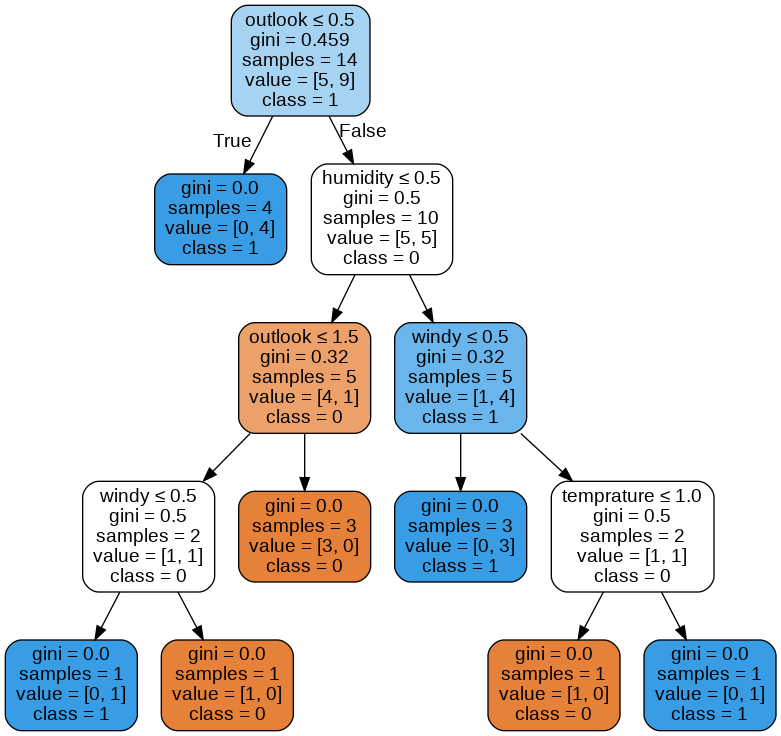

In [119]:
dot_data = StringIO()
export_graphviz(gini_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
gini_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
gini_graph.write_png('gini.png')
Image(gini_graph.create_png())

In [120]:
entropy_classifier =DecisionTreeClassifier(criterion="entropy", random_state=42)   
entropy_classifier.fit(X_train, y_train)                                            
y_pred= entropy_classifier.predict(X_test)

In [121]:
print("Entropy accuracy:", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  

Entropy accuracy: 1.0
[[1]]


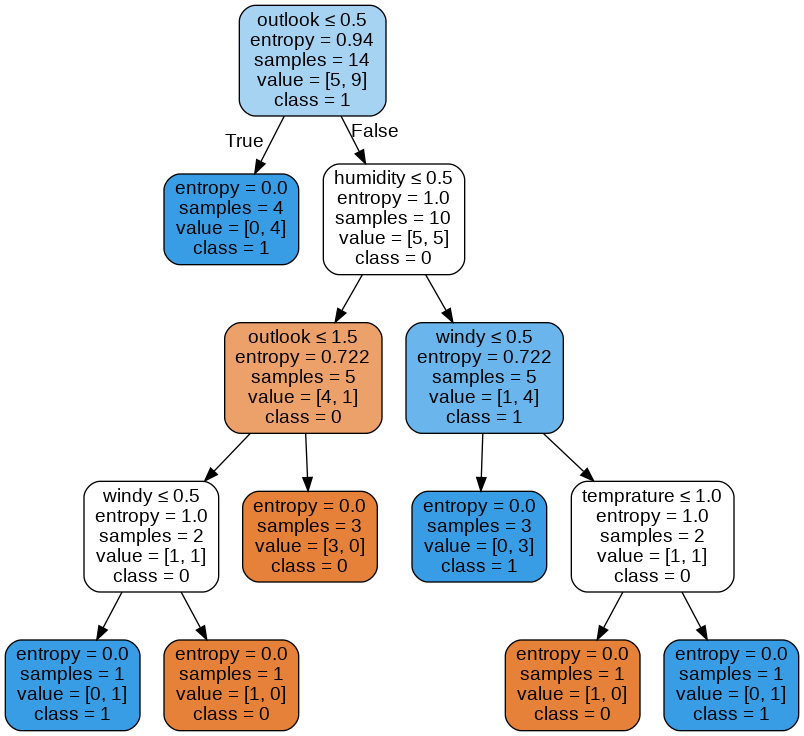

In [122]:
dot_data = StringIO()
export_graphviz(entropy_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
entropy_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
entropy_graph.write_png('entropy.png')
Image(entropy_graph.create_png())

The result of the 2 choices of criterion are the same, and are similar to the result given in part A.